In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("netflix.csv")
print(df.shape)
print(df.info())

(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratinglevel        941 non-null    object 
 3   ratingdescription  1000 non-null   int64  
 4   release_year       1000 non-null   int64  
 5   user_rating_score  605 non-null    float64
 6   user_rating_size   1000 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB
None


In [18]:
df.isnull().sum()



title                  0
rating                 0
ratinglevel           59
ratingdescription      0
release_year           0
user_rating_score    395
user_rating_size       0
dtype: int64

In [15]:
df.head()

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


In [19]:
df['user_rating_score'].fillna(df['user_rating_score'].mean(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_9172\2478303591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['user_rating_score'].fillna(df['user_rating_score'].mean(), inplace=True)


In [20]:
df

,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.000000,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,84.094215,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.000000,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.000000,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.000000,80
...,...,...,...,...,...,...,...
995,The BFG,PG,"for action/peril, some scary moments and brief...",60,2016,97.000000,80
996,The Secret Life of Pets,PG,for action and some rude humor,60,2016,84.094215,81
997,Precious Puppies,TV-G,Suitable for all ages.,35,2003,84.094215,82
998,Beary Tales,TV-G,Suitable for all ages.,35,2013,84.094215,82


In [21]:
df.isnull().sum()

title                 0
rating                0
ratinglevel          59
ratingdescription     0
release_year          0
user_rating_score     0
user_rating_size      0
dtype: int64

In [22]:
df.drop(['title','rating','ratinglevel','release_year'], axis=1, inplace=True)

In [23]:
df

,ratingdescription,user_rating_score,user_rating_size
0,80,82.000000,80
1,100,84.094215,82
2,90,98.000000,80
3,90,98.000000,80
4,70,94.000000,80
...,...,...,...
995,60,97.000000,80
996,60,84.094215,81
997,35,84.094215,82
998,35,84.094215,82


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_text, y_train, y_test = train_test_split(df[['user_rating_score','user_rating_size']],
                                                    df['ratingdescription'],
                                                    test_size=.3,
                                                    random_state=0)
x_train.shape,x_text.shape

((700, 2), (300, 2))

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_text_scaled = scaler.transform(x_text)

In [28]:
scaler.mean_

array([83.76062574, 80.76285714])

In [30]:
x_train_scaled

array([[-0.89201103, -0.78884715],
       [ 1.24621884, -0.78884715],
       [ 0.0339662 ,  1.27929145],
       ...,
       [ 0.94075743, -0.78884715],
       [ 0.0339662 ,  1.27929145],
       [ 1.24621884, -0.78884715]], shape=(700, 2))

In [31]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_text_scaled, columns=x_text.columns)


In [32]:
x_train.describe()

,user_rating_score,user_rating_size
count,700.000000,700.000000
mean,83.760626,80.762857
std,9.828231,0.967745
min,55.000000,80.000000
25%,82.000000,80.000000
50%,84.094215,80.000000
75%,91.000000,82.000000
max,99.000000,82.000000


In [34]:
np.round(x_train_scaled.describe(),1)

,user_rating_score,user_rating_size
count,700.0,700.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.9,-0.8
25%,-0.2,-0.8
50%,0.0,-0.8
75%,0.7,1.3
max,1.6,1.3


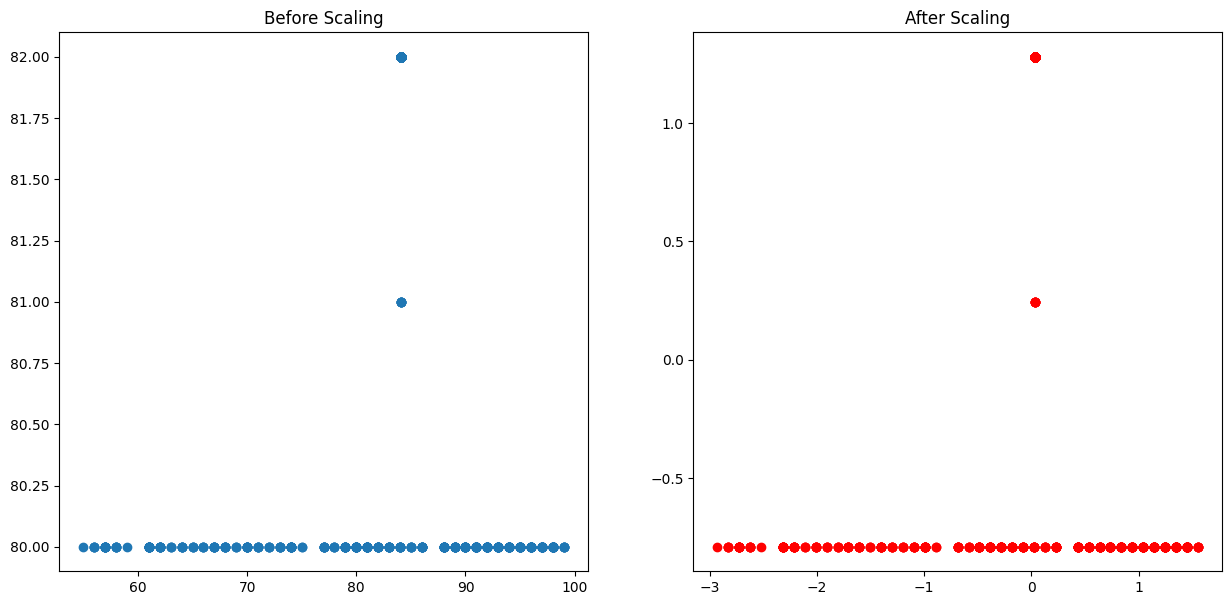

In [37]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15,7))
ax1.scatter(x_train['user_rating_score'],x_train['user_rating_size'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaled['user_rating_score'],x_train_scaled['user_rating_size'],color='red')
ax2.set_title('After Scaling')
plt.show()


<Axes: title={'center': 'After Standard Scaling'}, xlabel='user_rating_size', ylabel='Density'>

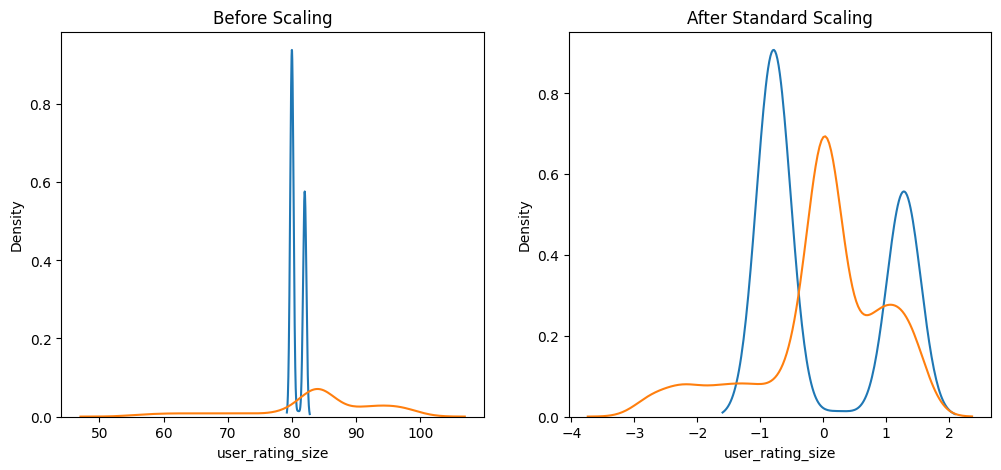

In [39]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['user_rating_size'], ax=ax1)
sns.kdeplot(x_train['user_rating_score'],ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(x_train_scaled['user_rating_size'], ax=ax2)
sns.kdeplot(x_train_scaled['user_rating_score'], ax=ax2)

In [40]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [41]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
y_pred = lr.predict(x_text)
y_pred_scaled = lr_scaled.predict(x_text_scaled)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
y_pred

array([90, 35, 35, 90, 90, 90, 90, 90, 90, 90, 90, 90, 35, 90, 35, 90, 90,
       90, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90, 90, 35, 90, 90,
       90, 90, 90, 35, 90, 90, 90, 90, 90, 35, 35, 90, 90, 90, 90, 90, 90,
       90, 90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
       90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
       90, 35, 90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,
       90, 90, 90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90,
       90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90,
       90, 90, 90, 90, 90, 35, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90,
       90, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 35,
       90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 35,
       90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 90, 35,
       90, 90, 90, 90, 35, 90, 90, 90, 90, 90, 90, 90, 35, 90, 90, 90, 35,
       90, 35, 90, 90, 35

In [44]:
y_pred_scaled

array([35, 35, 35, 90, 35, 35, 90, 35, 90, 90, 90, 35, 90, 35, 90, 90, 35,
       35, 35, 90, 35, 90, 90, 90, 90, 35, 35, 90, 90, 35, 35, 35, 90, 35,
       90, 90, 90, 90, 35, 90, 35, 90, 90, 90, 90, 90, 35, 90, 90, 35, 90,
       90, 35, 35, 90, 35, 90, 90, 35, 90, 35, 35, 90, 90, 90, 90, 90, 35,
       90, 35, 90, 90, 90, 35, 35, 90, 35, 35, 90, 90, 90, 90, 90, 35, 35,
       35, 90, 90, 90, 35, 90, 90, 35, 90, 35, 35, 90, 90, 90, 35, 35, 90,
       90, 90, 90, 35, 90, 35, 35, 35, 90, 35, 90, 35, 35, 35, 35, 90, 90,
       90, 35, 35, 90, 35, 90, 35, 35, 90, 35, 35, 35, 90, 35, 90, 35, 35,
       90, 90, 35, 35, 35, 90, 35, 35, 90, 35, 90, 90, 35, 35, 90, 90, 90,
       90, 35, 35, 90, 90, 90, 90, 35, 90, 35, 35, 90, 90, 90, 35, 90, 90,
       35, 90, 35, 35, 90, 90, 35, 35, 35, 35, 35, 90, 90, 90, 35, 35, 35,
       90, 90, 35, 35, 35, 35, 90, 35, 35, 90, 90, 90, 35, 90, 90, 90, 90,
       35, 90, 90, 35, 90, 35, 35, 90, 35, 35, 90, 35, 35, 35, 35, 35, 90,
       35, 35, 90, 90, 90

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print('Actual', accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.24333333333333335
Scaled 0.31666666666666665
